# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


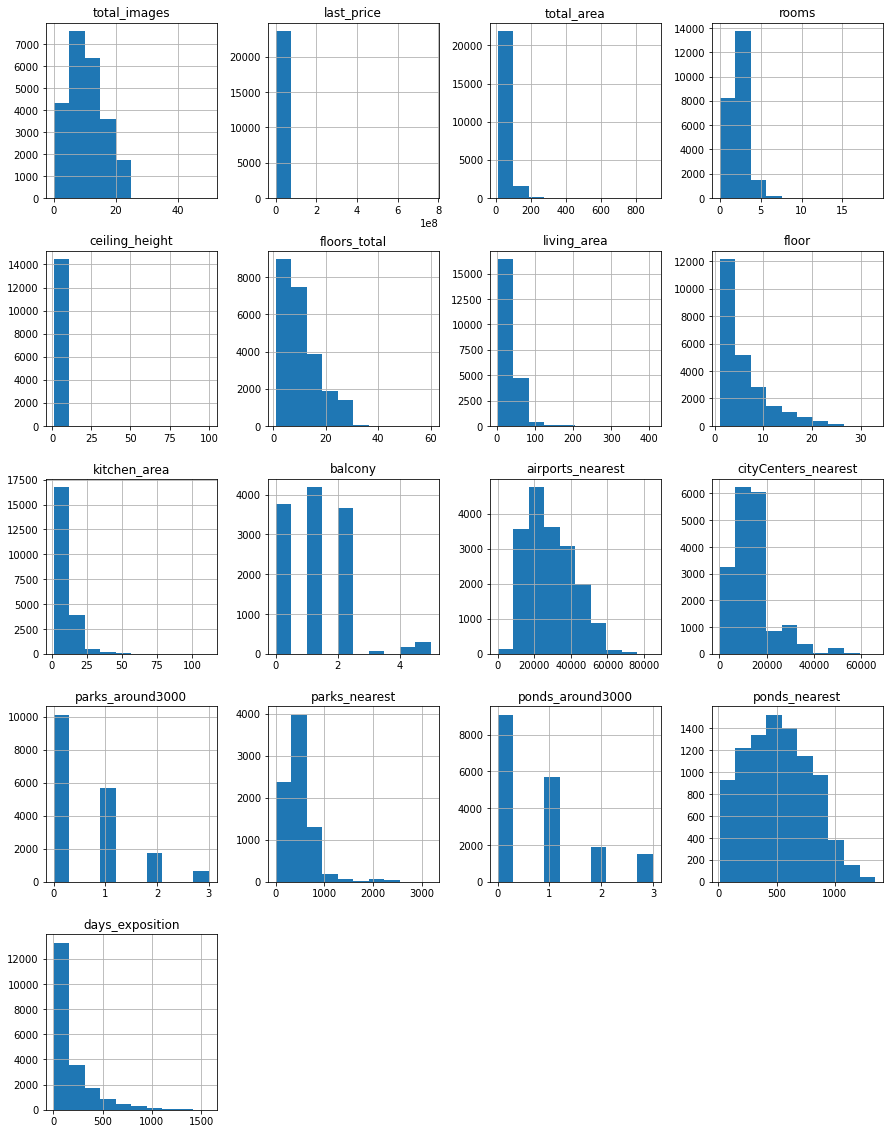

In [6]:
data.hist(figsize=(15, 20));

### Предобработка данных

#### Работа с пропусками и типом данных

In [7]:
data.isna().sum() #поиск NaN-значений

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Наибольшее количество пропусков в столбце "is_apartment" - с него и начнем. Пропуски возможны за счет того, что: люди не считают свое жилье за аппартаменты, не посчитали нужным указывать эту информацию (или любой другой человечский фактор по образу невнимательности, забывчивости).

P.S. Честно сказать, я не совсем понимаю, что имеется ввиду здесь под апартаментами. Апартаменты – объект коммерческой недвижимости, это значит, что здесь имеется ввиду подходит ли это помещение под какие-то офисы, салоны, мастерские и прочую предпринимательскую деятельность?

In [8]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пропуски' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

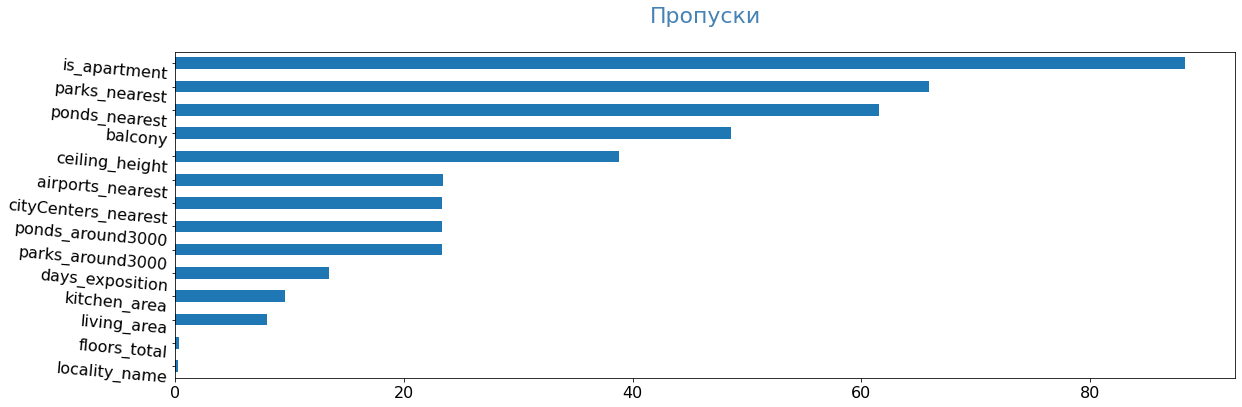

In [9]:
pass_value_barh(data)

Предположим, что если значение пропущено, то человек просто не тал указывать, что данное помещение НЕ принадлжеит к апартаментам. Просто заменим все значения NaN на False

In [10]:
data['is_apartment'].isna().sum()

20924

In [11]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum() #проверяем кол-во незаполненных значений

0

Следующие по количеству пропусков идут 'parks_nearest' и 'ponds_nearest', но заполнять эти значения самостоятельно, мне кажется, не стоит, поскольку мы не можем предположить расстояние или заполнить его средним значением.

Займемся балконами. 
1) В столбце тип данных float64, а в описании данных сказано, что в стоблце должно быть кол-во балконов. Вещественного числа быть не должно
2) Заполним пропуски 0, т.к. если число не указано, вероятно, балконов просто нет.

In [12]:
print(data['balcony'].isna().sum())
data['balcony'].head(10)

11519


0    NaN
1    2.0
2    0.0
3    0.0
4    NaN
5    NaN
6    1.0
7    2.0
8    NaN
9    2.0
Name: balcony, dtype: float64

In [13]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int64')
print('Кол-во пропусков в balcony:', data['balcony'].isna().sum())
data.info()

Кол-во пропусков в balcony: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  ob

Перейдем к 'ceiling_height' - высоте потолков. Возможно, значения не указали, потому что высота стандратная. Заменим значения на медианные.

In [14]:
print(data['ceiling_height'].isna().sum())
data['ceiling_height'].head(10)

9195


0    2.70
1     NaN
2     NaN
3     NaN
4    3.03
5     NaN
6     NaN
7     NaN
8     NaN
9    2.50
Name: ceiling_height, dtype: float64

In [15]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
print('Кол-во пропусков в ceiling_height:', data['ceiling_height'].isna().sum())
data['ceiling_height'].head(10)

Кол-во пропусков в ceiling_height: 0


0    2.70
1    2.65
2    2.65
3    2.65
4    3.03
5    2.65
6    2.65
7    2.65
8    2.65
9    2.50
Name: ceiling_height, dtype: float64

Перейдем к 'floors_total' - кол-ву этажей в доме. В данном столбце также заменим вещественный тип на целочисленный, т.к. кол-во этажей не может быть дробным.

In [16]:
print('Число пропусков:', data['floors_total'].isna().sum())
print('Всего значений:', data['floors_total'].count())

Число пропусков: 86
Всего значений: 23613


Число незаполненных значений, по сравнению с общим числом, сильно мало, поэтому можно просто их удалить.

In [17]:
data = data.loc[~(data['floors_total'].isna())]
data['floors_total'] = data['floors_total'].astype('int64')
print('Кол-во пропусков в floors_total:', data['floors_total'].isna().sum())
data.info()

Кол-во пропусков в floors_total: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  int64  
 7   living_area           21743 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          21382 non-null  float64
 13  balcony               23613 non-null  int64  
 14  locality_name         23565 non-nul

Перейдем к 'locality_name' - названиям населённого пункта. Количество пропусков в данном стобце тоже весьма мало, можно их удалить, но т.к. датасет питерский - заменим просто пропуски на Санкт-Петербург.

In [18]:
#data['locality_name'] = data['locality_name'].fillna('Санкт-Петербург')
print('Кол-во пропусков в locality_name:', data['locality_name'].isna().sum())

Кол-во пропусков в locality_name: 48


##### check area

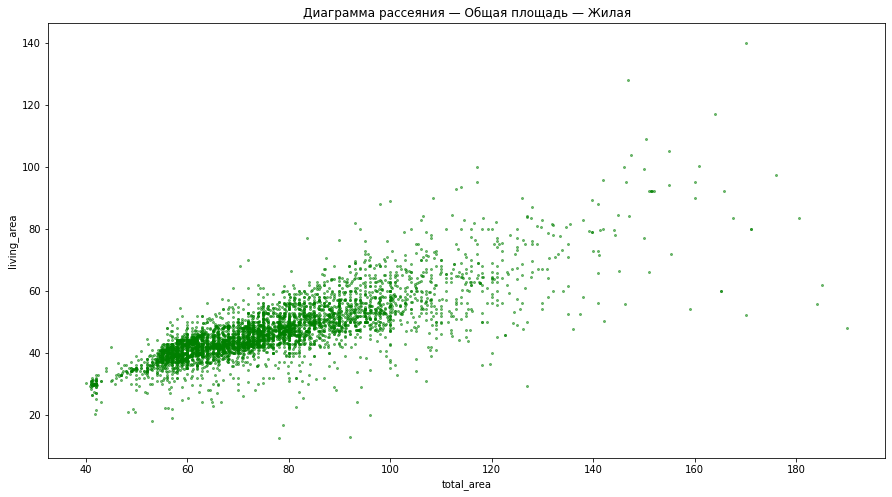

In [19]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'g', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

Заполним пропуски в столбцах 'parks_around3000' и 'ponds_around3000', предполагая, что если значения не указаны, то парки или пруды отсутствуют. Также заменим тип данных на целочисленный, т.к. количество парков и прудов не могут быть дробными

In [21]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].astype('int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')
print('Кол-во пропусков в parks_around3000:', data['parks_around3000'].isna().sum())
print('Кол-во пропусков в ponds_around3000:', data['ponds_around3000'].isna().sum())

Кол-во пропусков в parks_around3000: 0
Кол-во пропусков в ponds_around3000: 0


In [22]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000            0
parks_nearest           15568
ponds_around3000            0
ponds_nearest           14552
days_exposition          3172
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  int64  
 7   living_area           21743 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          21382 non-null  float64
 13  balcony               23613 non-null  int64  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Столбцы:
airports_nearest, 
cityCenters_nearest, 
parks_nearest, 
ponds_nearest, 
days_exposition,
оставим без изменений, т.к. мы не знаем точной информации про расстояние и наличие каких-то объектов. В случае days_exposition нам неизвестно - было ли снято объявление с продажи или же сколько дней оно провисело, поэтому тоже оставим как есть. 

#### Работа с дупликатами

Перейдем к работе с дупликатами. Посмотрим на наличие явных дупликатов.

In [24]:
data.duplicated().sum()

0

Явных дупликатов нет, перейдем к неявным. Перед этим преведем все названия в locality_name (т.к. строки есть тольку тут) к нижнему регистру.

In [25]:
data['locality_name'] = data['locality_name'].str.lower()

In [26]:
print(data['locality_name'].sort_values().unique()) #смотрим уникальные значения
len(data['locality_name'].unique()) #кол-во 

['бокситогорск' 'волосово' 'волхов' 'всеволожск' 'выборг' 'высоцк'
 'гатчина' 'городской поселок большая ижора' 'городской поселок янино-1'
 'городской посёлок будогощь' 'городской посёлок виллози'
 'городской посёлок лесогорский' 'городской посёлок мга'
 'городской посёлок назия' 'городской посёлок новоселье'
 'городской посёлок павлово' 'городской посёлок рощино'
 'городской посёлок свирьстрой' 'городской посёлок советский'
 'городской посёлок фёдоровское' 'городской посёлок янино-1'
 'деревня агалатово' 'деревня аро' 'деревня батово' 'деревня бегуницы'
 'деревня белогорка' 'деревня большая вруда' 'деревня большая пустомержа'
 'деревня большие колпаны' 'деревня большое рейзино'
 'деревня большой сабск' 'деревня бор' 'деревня борисова грива'
 'деревня ваганово' 'деревня вартемяги' 'деревня вахнова кара'
 'деревня выскатка' 'деревня гарболово' 'деревня глинка'
 'деревня горбунки' 'деревня гостилицы' 'деревня заклинье'
 'деревня заневка' 'деревня зимитицы' 'деревня извара' 'деревня исса

365

In [27]:
dupl_change = ["посёлок ", "поселок городского типа ", "поселок ", "деревня ",
         "посёлок городского типа ", "садовое товарищество ", "село ",
         "городской поселок ", "городской посёлок ", "поселок станции ",
         "посёлок при железнодорожной станции ", "городского типа ",
         "городской ", "при железнодорожной станции ", "станции ", "коттеджный ",
         "садоводческое некоммерческое товарищество "]

change = ''
data['locality_name'] = data['locality_name'].replace(dupl_change,change,regex=True)
print(data['locality_name'].sort_values().unique())
len(data['locality_name'].unique())

['агалатово' 'александровская' 'алексеевка' 'аннино' 'аро' 'барышево'
 'батово' 'бегуницы' 'белогорка' 'белоостров' 'бокситогорск'
 'большая вруда' 'большая ижора' 'большая пустомержа' 'большие колпаны'
 'большое рейзино' 'большой сабск' 'бор' 'борисова грива' 'бугры'
 'будогощь' 'ваганово' 'важины' 'вартемяги' 'вахнова кара' 'вещево'
 'виллози' 'вознесенье' 'возрождение' 'войсковицы' 'войскорово'
 'володарское' 'волосово' 'волхов' 'всеволожск' 'выборг' 'вырица'
 'выскатка' 'высокоключевой' 'высоцк' 'гаврилово' 'гарболово' 'гатчина'
 'гладкое' 'глажево' 'глебычево' 'глинка' 'гончарово' 'горбунки'
 'гостилицы' 'громово' 'дзержинского' 'дружная горка' 'дружноселье'
 'дубровка' 'елизаветино' 'ефимовский' 'жилгородок' 'жилпосёлок' 'житково'
 'заводской' 'заклинье' 'заневка' 'запорожское' 'зеленогорск' 'зимитицы'
 'ивангород' 'извара' 'ильичёво' 'имени морозова' 'имени свердлова'
 'иссад' 'калитино' 'каложицы' 'кальтино' 'каменногорск' 'камышовка'
 'каськово' 'келози' 'кивеннапа север' 'кик

306

In [28]:
# check
data['locality_name'].nunique()

305

#### Аномальные значения

В столбце 'ceiling_height'есть значения, которые выбиваются из общей массы - 20, 22, 100 и т.д. Возможно, здесь пропущена разделительный знак, поэтому просто исправим это

In [29]:
data.loc[data['ceiling_height']>=20, 'ceiling_height'] = data['ceiling_height']/10

Рассмотрим цену недвижимости. Недвижимость с очень болшой ценой (пусть будет выше 20000000), думаю, можно отбросить.

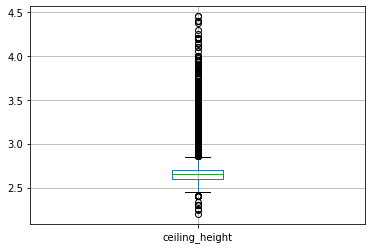

count    23571.000000
mean         2.695449
std          0.210738
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.450000
Name: ceiling_height, dtype: float64

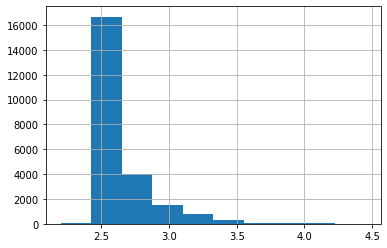

In [30]:
data = data.query('2 < ceiling_height < 4.5')
data.boxplot('ceiling_height');
plt.show()
data['ceiling_height'].hist();
data['ceiling_height'].describe()

In [31]:
# check
data.shape[0]

23571

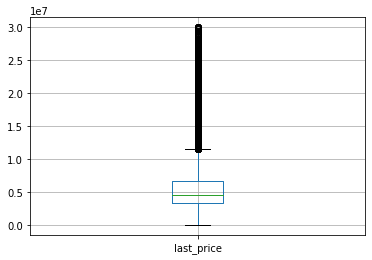

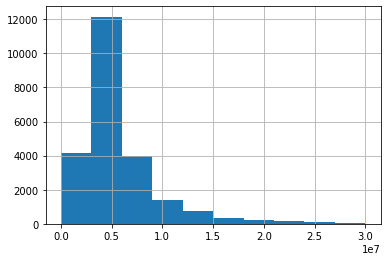

In [32]:
data = data.query('last_price < 30000000')
data.boxplot('last_price');
plt.show()
data['last_price'].hist();

In [33]:
# check
data.shape[0]

23255

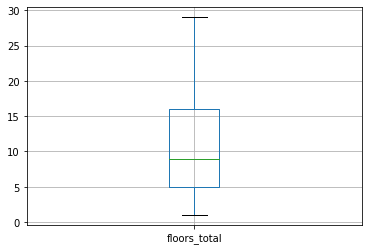

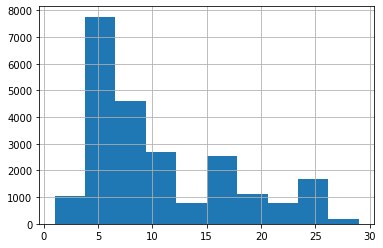

In [34]:
data = data.query('floors_total < 30')
data.boxplot('floors_total');
plt.show()
data['floors_total'].hist();

In [35]:
data.shape[0]

23224

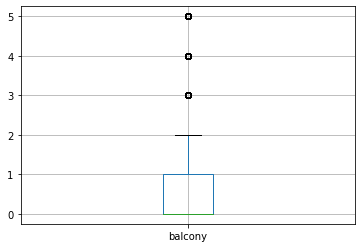

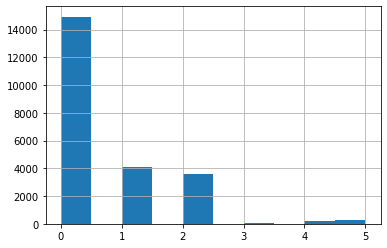

In [36]:
data.boxplot('balcony');
plt.show()
data['balcony'].hist();

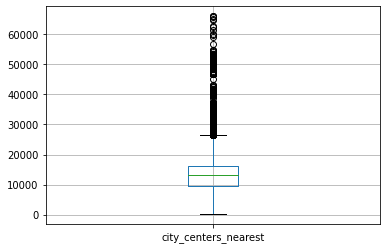

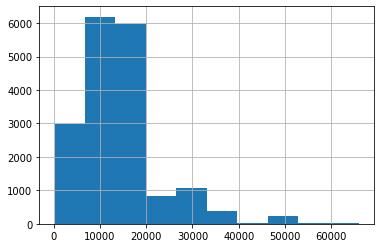

In [37]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})
data.boxplot('city_centers_nearest');
plt.show()
data['city_centers_nearest'].hist();

С расстоянием до центра все в порядке. Только следует переименовать столбец 

count    23060.000000
mean       147.888031
std        192.012928
min         -1.000000
25%         22.000000
50%         72.000000
75%        193.000000
max       1094.000000
Name: days_exposition, dtype: float64

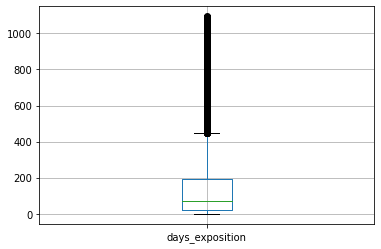

In [39]:
data['days_exposition'] = data['days_exposition'].fillna(-1)
data = data.query('days_exposition < 365*3') #оставим значения за 3 года
data.boxplot('days_exposition');
data['days_exposition'].describe()

In [40]:
# check
data.shape[0]

23060

In [41]:
data['kitchen_area'].shape[0]

23060

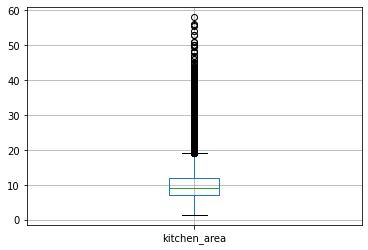

count    20873.000000
mean        10.270239
std          4.995584
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max         58.000000
Name: kitchen_area, dtype: float64

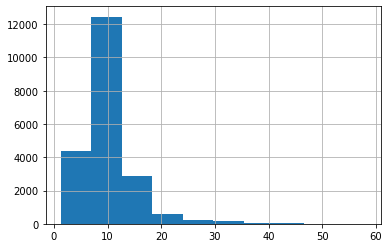

In [42]:
data = data.loc[(data['kitchen_area']<60) | data['kitchen_area'].isna()]
#data = data.loc[~data['kitchen_area'].isna()]
data.boxplot('kitchen_area');
plt.show()
data['kitchen_area'].hist();
data['kitchen_area'].describe()

In [43]:
data['kitchen_area'].shape[0]

23052

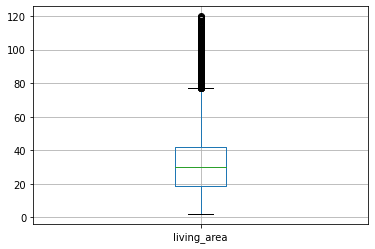

count    21132.000000
mean        32.676518
std         16.278768
min          2.000000
25%         18.500000
50%         30.000000
75%         41.900000
max        119.900000
Name: living_area, dtype: float64

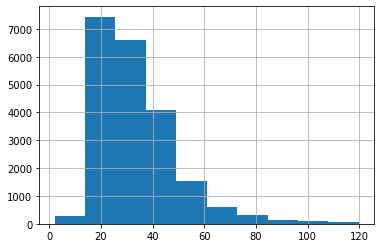

In [44]:
data = data.loc[(data['living_area']<120) | data['living_area'].isna()]
data.boxplot('living_area');
plt.show()
data['living_area'].hist();
data['living_area'].describe()

In [45]:
data['living_area'].shape[0]

22949

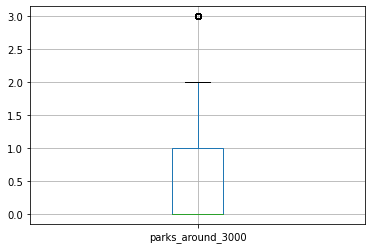

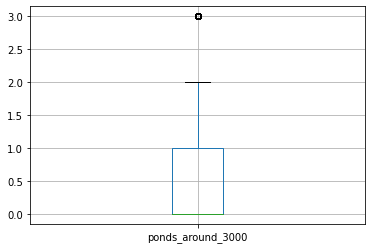

In [47]:
data = data.rename(columns={'parks_around3000': 'parks_around_3000',
                  'ponds_around3000': 'ponds_around_3000'})
data.boxplot('parks_around_3000');
plt.show()
data.boxplot('ponds_around_3000');

С парками и прудами все в порядке, только переименуем столбцы

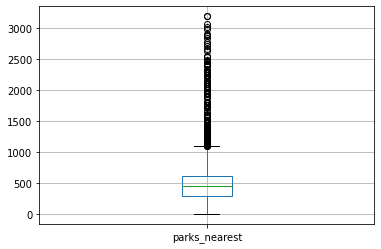

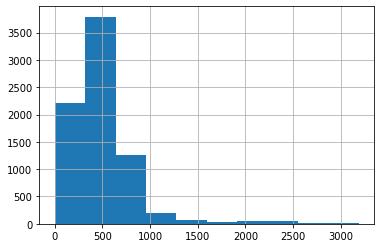

In [48]:
data.boxplot('parks_nearest');
plt.show()
data['parks_nearest'].hist();

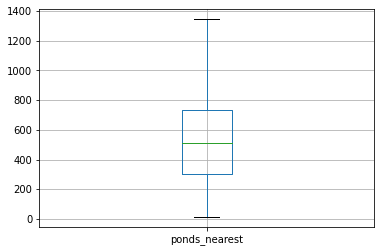

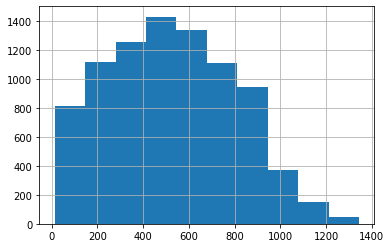

In [49]:
data.boxplot('ponds_nearest');
plt.show()
data['ponds_nearest'].hist();

count    22699.000000
mean         2.022688
std          0.937592
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

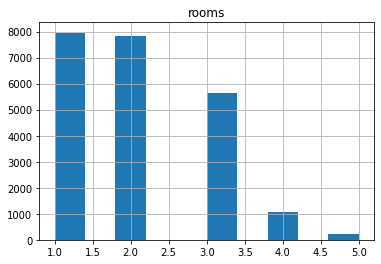

In [50]:
data = data.query('0 < rooms < 6') #решила оставить только квартиры с 1-5 комнатами, т.к. всех остальных было довольно мало
data.hist('rooms');
data['rooms'].describe()

count    22676.000000
mean        57.114225
std         24.142937
min         12.000000
25%         40.000000
50%         51.300000
75%         67.900000
max        199.200000
Name: total_area, dtype: float64

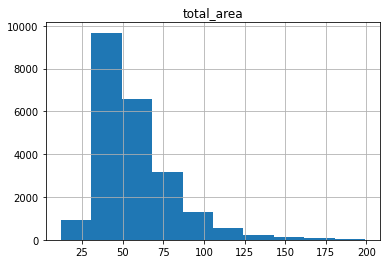

In [51]:
data = data.query('total_area < 200')
data.hist('total_area');
data['total_area'].describe()

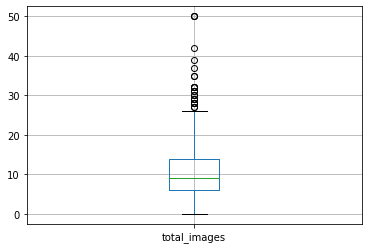

In [53]:
data.boxplot('total_images');

Кто-то очень ответсвенно подошел к загрузке фотографий... Оставим все так.

__По итогу, я избавилась от пропусков, заменив их, где можно, какими-то значениями; изменила тип данных у некоторых колонок; почистила датасет от дупликатов и различных аномальных значений.__

In [55]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,676.00","22,676.00","22,676.00","22,676.00","22,676.00","20,883.00","20,704.00","22,676.00","22,676.00"
min,1.00,12.00,2.20,-1.00,"12,190.00",2.00,1.30,1.00,1.00
max,5.00,199.20,4.40,"1,094.00","29,999,000.00",119.90,58.00,27.00,29.00


In [60]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,1.00,20.61,2.40,-1.00,"561,050.00",10.00,3.78,1.00,2.00
0.01,1.00,27.00,2.50,-1.00,"1,000,000.00",13.00,5.00,1.00,2.00
0.5,2.00,51.30,2.65,72.00,"4,600,000.00",30.00,9.00,4.00,9.00
0.99,4.00,145.55,3.50,897.25,"21,762,500.00",87.00,30.00,22.00,26.00
0.9988,5.00,180.08,4.00,"1,073.58","28,089,105.00",110.00,45.00,26.00,27.00


count    22672.000000
mean       148.007807
std        191.851731
min         -1.000000
25%         22.000000
50%         72.000000
75%        193.000000
max       1094.000000
Name: days_exposition, dtype: float64

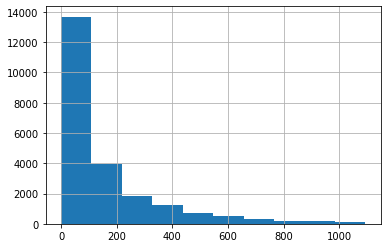

In [64]:
data = data.loc[data['days_exposition'] != 1]
data = data.loc[data['days_exposition'] != 2]
data['days_exposition'].hist()
data['days_exposition'].describe()

count    22247.000000
mean        57.713580
std         23.976191
min         29.100000
25%         40.800000
50%         52.000000
75%         68.000000
max        199.200000
Name: total_area, dtype: float64

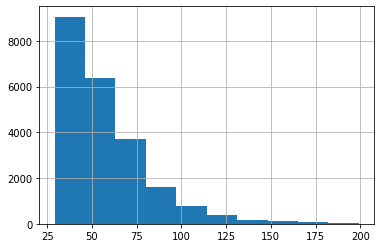

In [65]:
data = data.loc[(data['total_area'] > 29) & (data['total_area'] < 220)]
data['total_area'].hist();
data['total_area'].describe()

count    20438.000000
mean        32.969671
std         15.820092
min         11.100000
25%         19.000000
50%         30.000000
75%         42.000000
max        119.900000
Name: living_area, dtype: float64

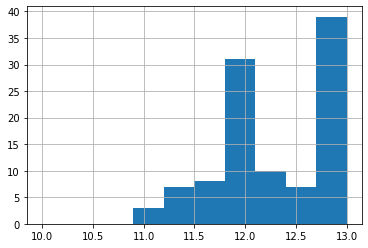

In [66]:
data = data.loc[(data['living_area'] > 11)|(data['living_area'].isna())]
data['living_area'].hist(range = (10,13));
data['living_area'].describe()

In [67]:
data['living_area'].shape[0]

22172

count    20338.000000
mean        10.239805
std          4.863666
min          5.000000
25%          7.000000
50%          9.000000
75%         11.700000
max         58.000000
Name: kitchen_area, dtype: float64

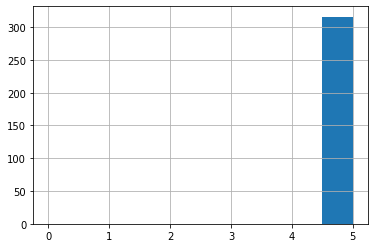

In [68]:
data = data.loc[(data['kitchen_area'] >= 5)|(data['kitchen_area'].isna())]
data['kitchen_area'].hist(range = (0,5));
data['kitchen_area'].describe()

In [69]:
data['kitchen_area'].shape[0]

22108

count    22037.000000
mean         2.687676
std          0.194928
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.190000
Name: ceiling_height, dtype: float64

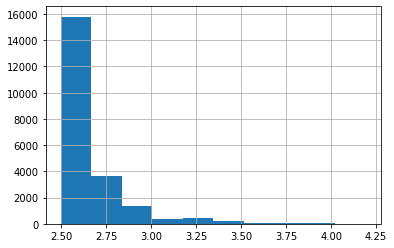

In [70]:
data = data.loc[(data['ceiling_height'] < 4.2)&(2.5 <= data['ceiling_height'])]
data['ceiling_height'].hist();
data['ceiling_height'].describe()

### Посчитайте и добавьте в таблицу новые столбцы

Расчет цены одного кдваратного метра.
Для этого нужно поделить цену недвижимости на общую площадь.

In [73]:
data['price_by_sqrm'] = data['last_price'] / data['total_area']

Добавляем в таблицу столбцы с днем, месяцем и годои публикации

In [74]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['day_published'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month_published'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_published'] = pd.DatetimeIndex(data['first_day_exposition']).year

Добавляем в таблицу тип этажа квартиры

In [75]:
def type_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    elif 1 < row['floor'] < row['floors_total']:
        return 'другой'

data['type_floor'] = data.apply(type_floor, axis=1)

Расстояние в км до центра города

In [76]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

### Проведите исследовательский анализ данных

#### Гистограммы для параметров

Построим гистограммы для отдельных параметров и рассмотрим их

count    22037.000000
mean        57.819539
std         24.003296
min         29.100000
25%         41.000000
50%         52.000000
75%         68.300000
max        199.200000
Name: total_area, dtype: float64

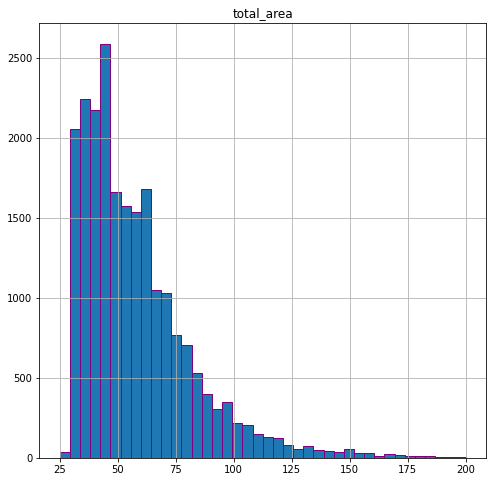

In [77]:
data.hist('total_area', bins=40, range=(25,200), figsize = (8,8), ec='purple')
data['total_area'].describe()

По графику видно, что больше всего значений в диапозоне от ~30 до 50. Меньше всего начиная от ~160

count    20307.000000
mean        32.974627
std         15.840181
min         11.100000
25%         19.000000
50%         30.000000
75%         42.000000
max        119.900000
Name: living_area, dtype: float64

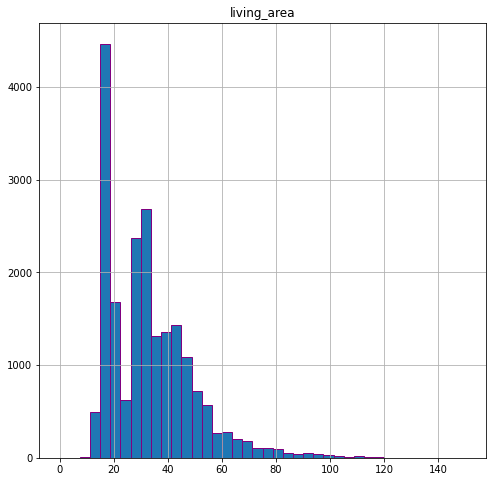

In [78]:
data.hist('living_area', bins=40, range=(0,150), figsize = (8,8), ec='purple')
data['living_area'].describe()

По графику видно, что больше всего значений около ~24. Есть еще всплекс около ~38. После 50 идет стремительное снижение

count    20272.000000
mean        10.242039
std          4.860556
min          5.000000
25%          7.000000
50%          9.000000
75%         11.700000
max         58.000000
Name: kitchen_area, dtype: float64

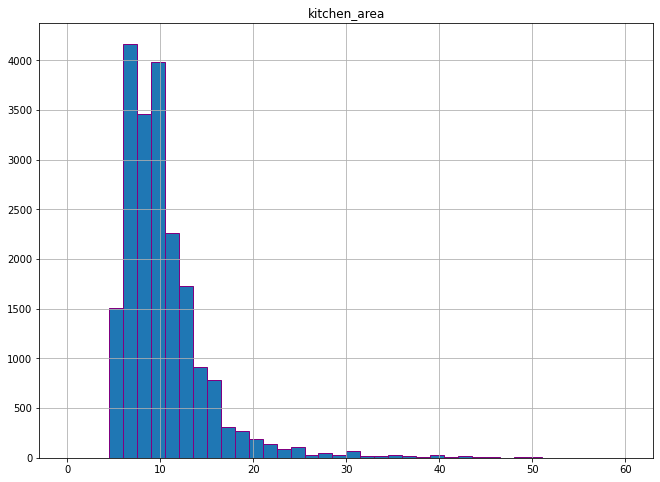

In [79]:
data.hist('kitchen_area', bins=40, range=(0,60), figsize = (11,8), ec='purple')
data['kitchen_area'].describe()

Большая часть имеет кухню площадью до ~13м, в два раза меньше с кухней ~8м.

count    2.203700e+04
mean     5.689896e+06
std      3.811290e+06
min      1.219000e+04
25%      3.499999e+06
50%      4.650000e+06
75%      6.600000e+06
max      2.999900e+07
Name: last_price, dtype: float64

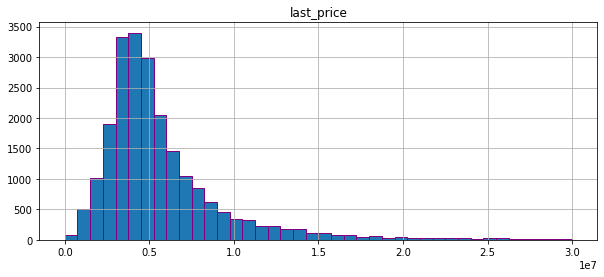

In [80]:
data.hist('last_price', bins=40, range=(0,30000000),figsize = (10,4), ec='purple')
data['last_price'].describe()

Основной диапозон цен находится в пределах от 3 млн до 5 млн

count    22037.000000
mean         2.042293
std          0.934227
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

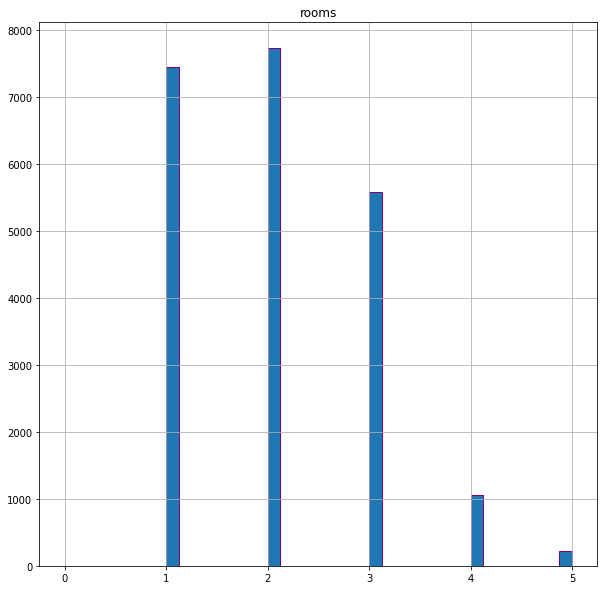

In [81]:
data.hist('rooms', bins=40, range=(0,5), figsize = (10,10), ec='purple')
data['rooms'].describe()

Большая часть помещений 1- или 2-комнатные. Чуть меньше приходится на 3-комнатные. Всех остальных в разы меньше

count    22037.000000
mean         2.687676
std          0.194928
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.190000
Name: ceiling_height, dtype: float64

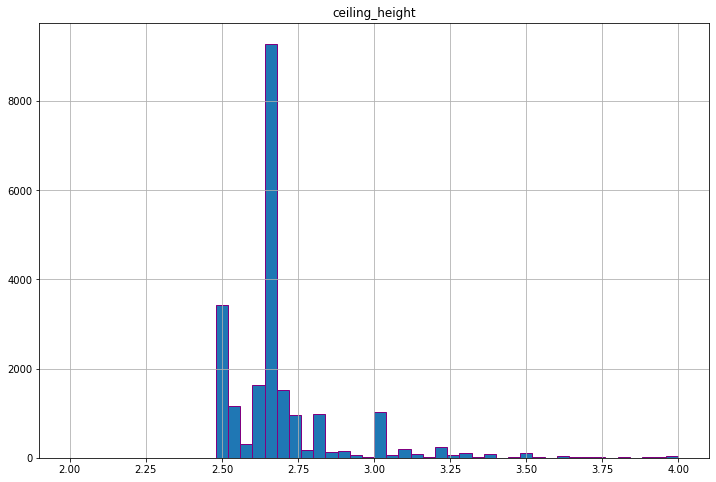

In [82]:
data.hist('ceiling_height', bins=50, range = (2, 4), figsize=(12,8), ec='purple');
data['ceiling_height'].describe()

Больше всего помещений с высотой потолков ~2,65

count    22037.000000
mean         5.858692
std          4.835316
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

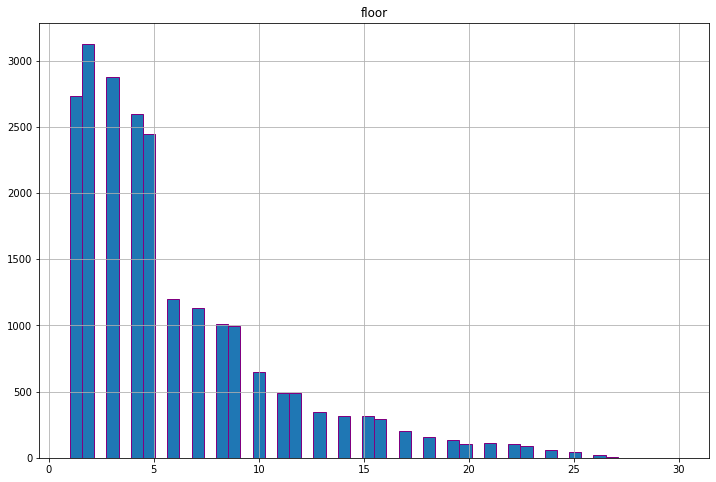

In [83]:
data.hist('floor', bins=50, range = (1, 30), figsize=(12,8), ec='purple');
data['floor'].describe()

Больше всего продается помещений, расположеннных на 1-5 этажах. После этого значения идет быстрый спад.

count      22037
unique         3
top       другой
freq       16226
Name: type_floor, dtype: object

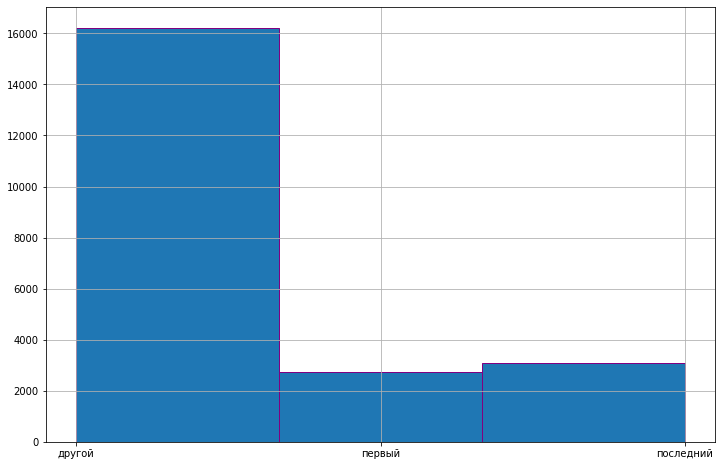

In [84]:
data['type_floor'].hist(bins=3, figsize=(12,8), ec='purple');
data['type_floor'].describe()

count    22037.000000
mean        10.660889
std          6.510944
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

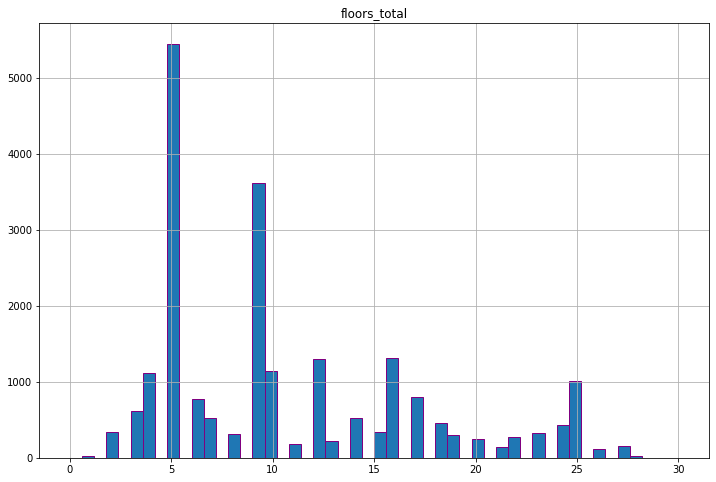

In [85]:
data.hist('floors_total', bins=50, range = (0, 30), figsize=(12,8), ec='purple');
data['floors_total'].describe()

Больше всего зданий, у которых макисмальное число этажей 5, почти на 30% меньше тех, у кого 9.

count    16882.000000
mean     14404.269518
std       8550.989924
min        208.000000
25%       9704.500000
50%      13224.500000
75%      16337.000000
max      65952.000000
Name: city_centers_nearest, dtype: float64

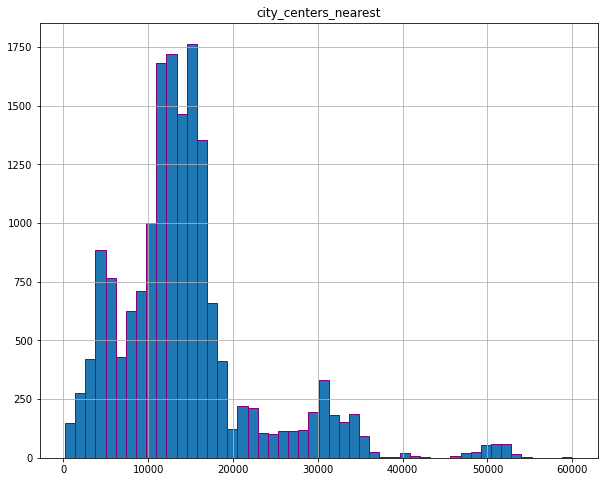

In [86]:
data.hist('city_centers_nearest', bins=50, range = (200, 60000), figsize=(10,8), ec='purple');
data['city_centers_nearest'].describe()

Большая часть помещений находится в пределах 20 км от центра

count    16862.000000
mean     28948.928241
std      12734.179018
min          0.000000
25%      18446.750000
50%      27056.000000
75%      37434.000000
max      84853.000000
Name: airports_nearest, dtype: float64

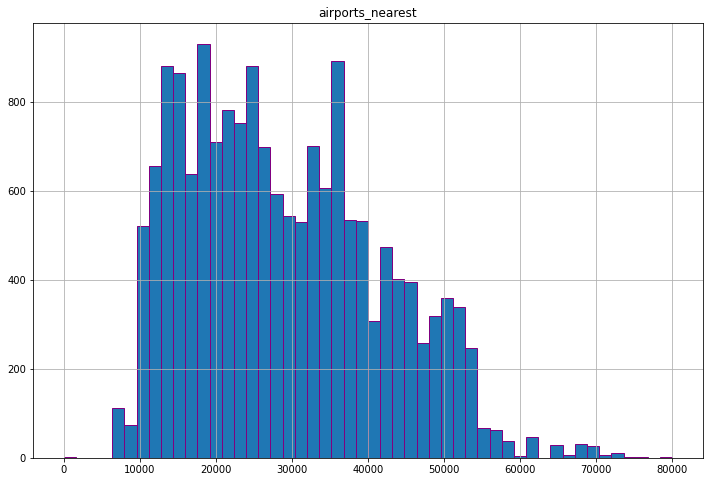

In [87]:
data.hist('airports_nearest', bins=50, range = (0, 80000), figsize=(12,8), ec='purple');
data['airports_nearest'].describe()

В основном аэрпорт находится на расстоянии от 10 до 40 км

count    7404.000000
mean      493.672880
std       341.778925
min         1.000000
25%       289.750000
50%       456.000000
75%       616.000000
max      3190.000000
Name: parks_nearest, dtype: float64

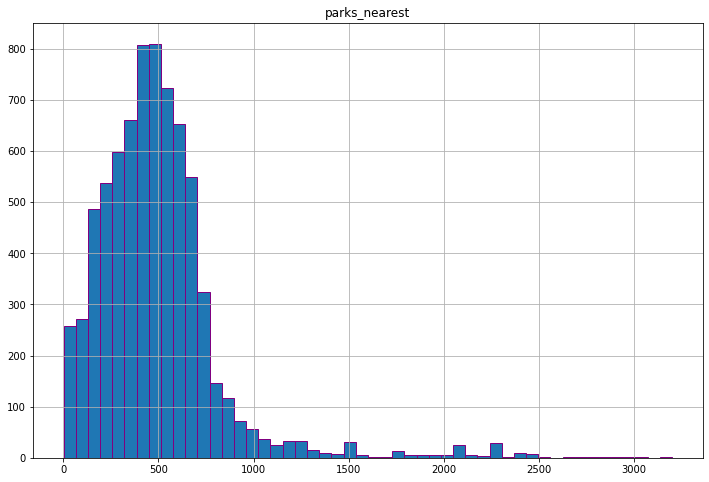

In [88]:
data.hist('parks_nearest', bins=50, range = (1, 3200), figsize=(12,8), ec='purple');
data['parks_nearest'].describe()

Большая часть парков находится в пределах 750м от помещений

count    22037.000000
mean         2.569905
std          1.790862
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_published, dtype: float64

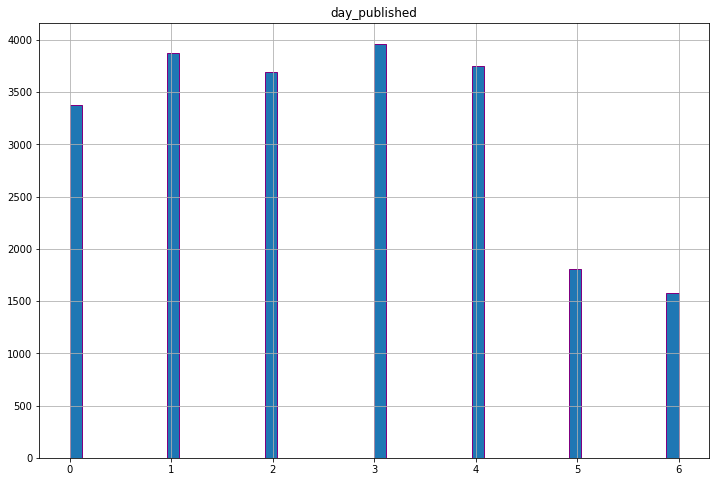

In [89]:
data.hist('day_published', bins=50, range = (0, 6), figsize=(12,8), ec='purple');
data['day_published'].describe()

Меньше всего объявлений выложены в выходные дни

count    22037.000000
mean         6.399011
std          3.493014
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_published, dtype: float64

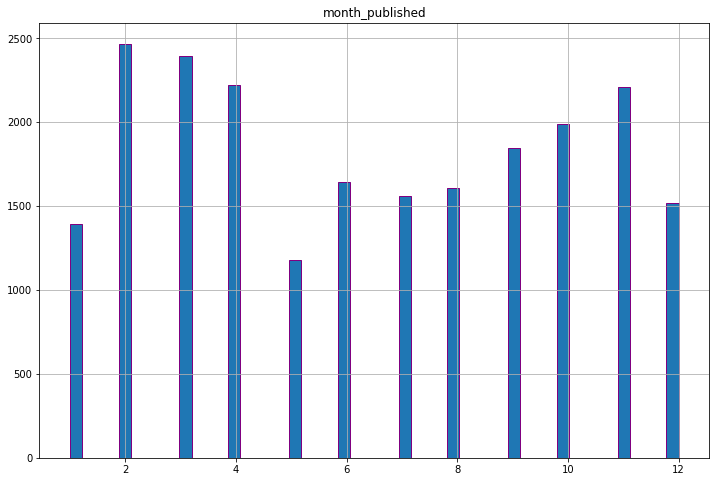

In [90]:
data.hist('month_published', bins=50, range = (1, 12), figsize=(12,8), ec='purple');
data['month_published'].describe()

Меньше всего объявлений в январе и мае, также не очень большое кол-во в летние месяцы. Возможно, это связано с большим кол-вом праздничных/выходных/отпускных дней.

#### Скорость продажи квартир

count    22037.000000
mean       148.486182
std        192.416862
min         -1.000000
25%         22.000000
50%         73.000000
75%        193.000000
max       1094.000000
Name: days_exposition, dtype: float64

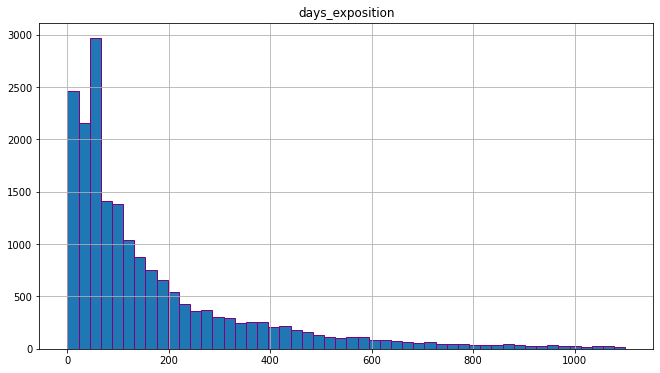

In [91]:
data.hist('days_exposition', bins=50, range=(0,1100), figsize=(11,6), ec='purple')
data['days_exposition'].describe()

Чаще всего, объявление закрывается в течение полугода после публикации. Среднее значение - 163, медианное - 89. Мне кажется, можно сказать, что быстрыми продажами можно считать те,что закрылись до 43 дней, а медленными начиная с 212 дней.

#### Общая (полная) стоимость объекта

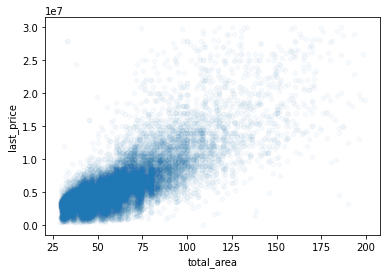

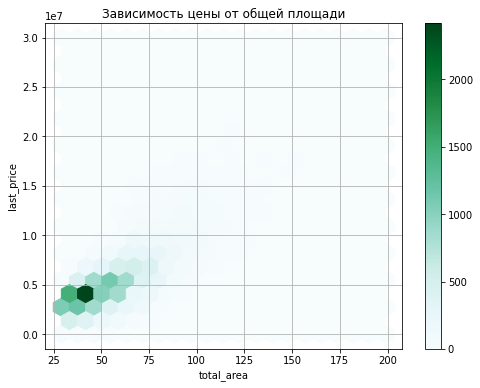

In [92]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.03);
plt.show()
data.plot(x='total_area', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6),
          sharex=False, grid=True, title='Зависимость цены от общей площади');

In [93]:
data['last_price'].corr(data['total_area'])

0.7771790233698314

Чем больше метраж квартиры, тем больше стоимость. Коэффициент корреляции равен 0.78, что говорит о достаточно сильной тесноте связи между факторами. 

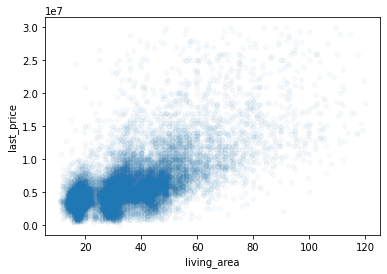

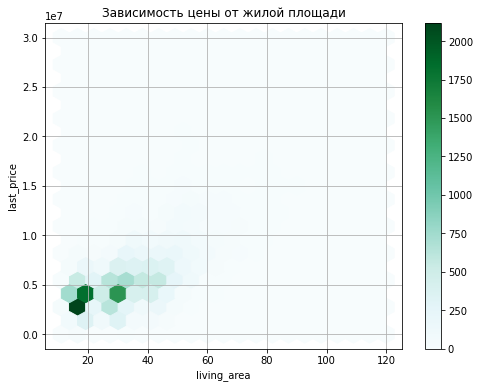

In [94]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.03);
plt.show()
data.plot(x='living_area', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6),
          sharex=False, grid=True, title='Зависимость цены от жилой площади');

In [95]:
data['last_price'].corr(data['living_area'])

0.6550277090066082

Чем больше жилая площапдь квартиры, тем больше стоимость. Коэффициент корреляции равен 0.65, что говорит о достаточно сильной тесноте связи между факторами, хоть и чуть слабее, по сравнению с прошлым.

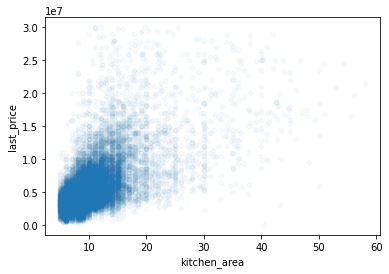

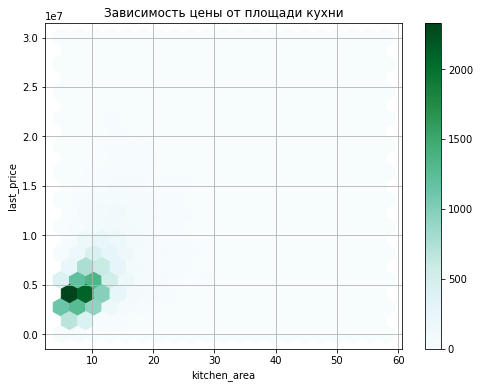

In [96]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.03);
plt.show()
data.plot(x='kitchen_area', y='last_price', kind='hexbin', gridsize=20,
          figsize=(8, 6), sharex=False, grid=True, title='Зависимость цены от площади кухни');

In [97]:
data['last_price'].corr(data['kitchen_area'])

0.6014006217974819

Зависимость между площадью кухни и ценой незначиательная. Коэффициент корреляции равен 0.6, что говорит о слабой связи между факторами. 

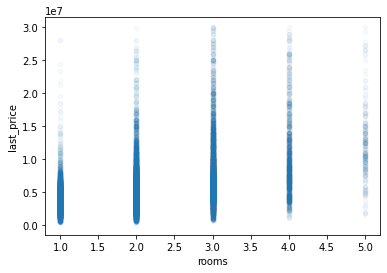

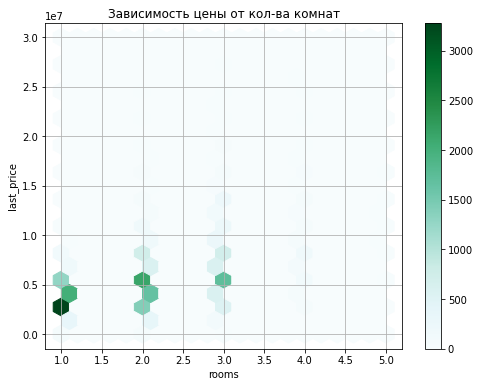

In [98]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.03);
plt.show()
data.plot(x='rooms', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True, title='Зависимость цены от кол-ва комнат');

In [99]:
data['last_price'].corr(data['rooms'])

0.46581705164052317

Зависимость между кол-вом комнат и ценой сильнее, чем между ценой и метражом кухни, но коэффицент корреляции в 0.4, что все равно говорит о не сильной связи.

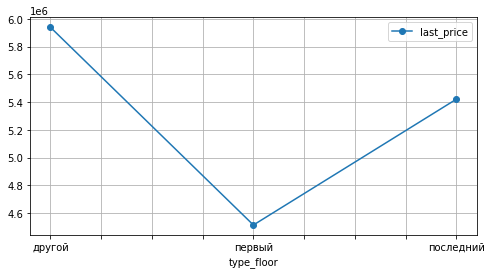

In [100]:
(data.pivot_table(index='type_floor', values='last_price').plot(grid=True, style='o-',figsize=(8, 4)));

Дешевле всего по стоимости первый этаж. Коэффицента корреляции нет, т.к. он рассчитывается только для численных значений.

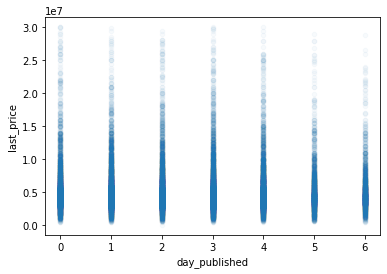

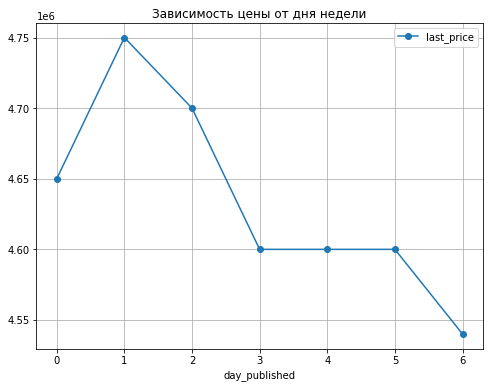

In [101]:
data.plot(x='day_published', y='last_price', kind='scatter', alpha=0.03);
plt.show()
(data.pivot_table(index='day_published', values='last_price', aggfunc='median').
    plot(grid=True, style='o-',figsize=(8, 6), title='Зависимость цены от дня недели'));

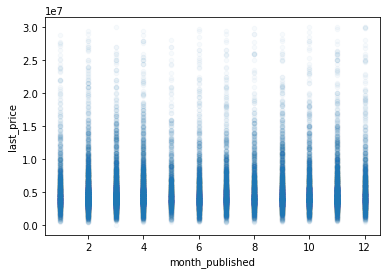

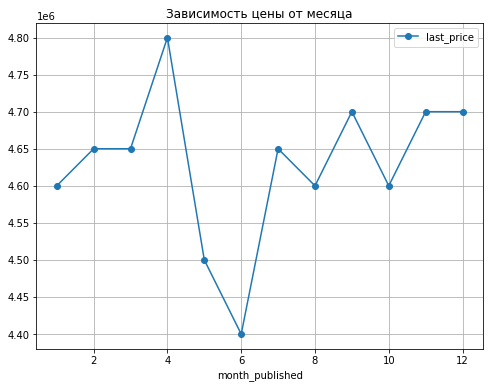

In [102]:
data.plot(x='month_published', y='last_price', kind='scatter', alpha=0.03);
plt.show()
(data.pivot_table(index='month_published', values='last_price', aggfunc='median').
    plot(grid=True, style='o-',figsize=(8, 6), title='Зависимость цены от месяца'));

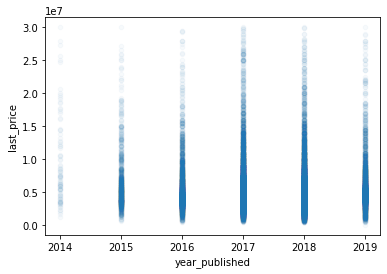

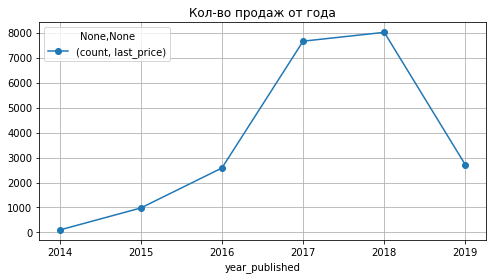

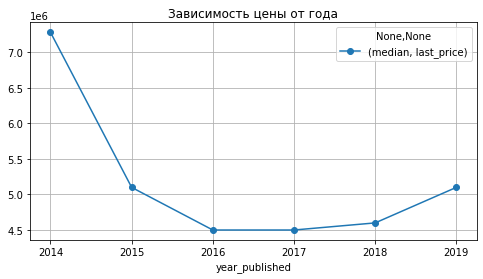

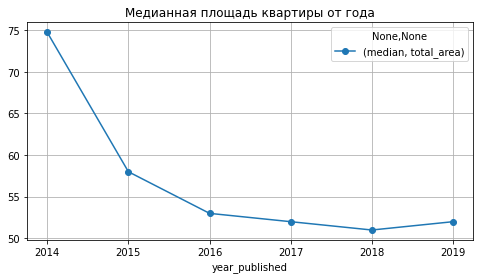

In [103]:
data.plot(x='year_published', y='last_price', kind='scatter', alpha=0.03);
plt.show()
(data.pivot_table(index='year_published', values='last_price', aggfunc=['count']).
    plot(grid=True, style='o-',figsize=(8, 4), title='Кол-во продаж от года'));
plt.show()
(data.pivot_table(index='year_published', values='last_price', aggfunc=['median']).
    plot(grid=True, style='o-',figsize=(8, 4), title='Зависимость цены от года'));
plt.show()
(data.pivot_table(index='year_published', values='total_area', aggfunc=['median']).
    plot(grid=True, style='o-',figsize=(8, 4), title='Медианная площадь квартиры от года'));

In [104]:
len(data[data.year_published == 2014]) #кол-во объявлений в 2014

98

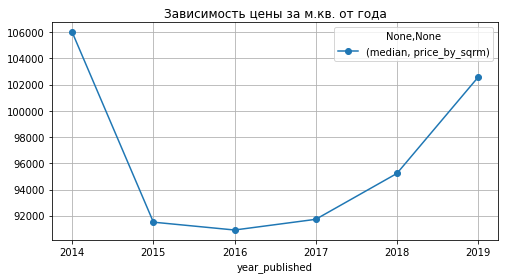

In [105]:
(data.pivot_table(index='year_published', values='price_by_sqrm', aggfunc=['median']).
    plot(grid=True, style='o-',figsize=(8, 4), title='Зависимость цены за м.кв. от года'));

По графикам можно видеть, что наибольший пик в цене на квартиры пришолся на 2014 год. Но рассматривать это всерьез не стоит, т.к. выборка за этот год составляет меньше 100. Все же стоит отметить тот факт, что в 2014 площадь продаваемых квартир была в среднем выше, от чего также могла увеличиться стоимость.

Если начать рассматривать с 2015 года, где кол-во объявлений хотя бы около 1000, то рост цен, в сравнении с другими годами, не настолько большой.

Рассматривая графики с зависимостью цены от года и площади от года, можно замтетить, что эти величины изменяются почти пропорциоально друг другу. Так видно, что с общей снижаемостью площади - в той или иной мере снижается и цена. Но при этом цена за квадратный метр сильно отличается: так в 2015 и 2019 годах, примерно, одинаковая площадь, но в 2019 цена за квадратный метр сильно выше. А не очень невысокая цена в 2018 и 2017 года может быть связана с тем, что кол-во объявлений в эти периоды было наибольшим, в следствии чего, было снижение цен.

#### Средня цена квадратного метра

In [106]:
price = data.pivot_table(index='locality_name', values='price_by_sqrm', aggfunc=['count', 'median'])
price.columns = ['count', 'median']
price = price.sort_values('count', ascending=False)
price.head(10)

,count,median
locality_name,,
санкт-петербург,14531,103741.496599
мурино,503,83333.333333
шушары,421,75949.367089
кудрово,420,94475.988155
всеволожск,383,65789.473684
пушкин,345,99744.245524
колпино,331,74468.085106
парголово,313,91516.560139
гатчина,300,67925.849585


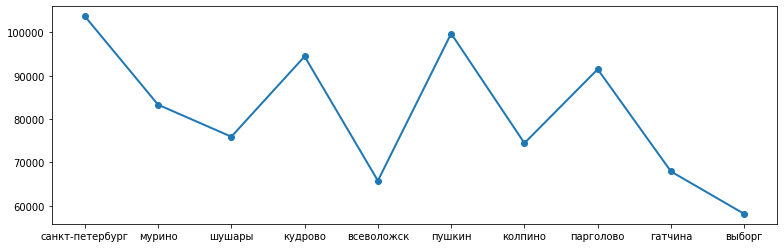

In [116]:
price = data.pivot_table(index='locality_name', values='price_by_sqrm', aggfunc=['count', 'median'])
price.columns = ['count', 'median']
price = price.sort_values('count', ascending=False)
price = price.head(10)
fig, ax = plt.subplots(figsize=(13,4))
ax.plot(price['median'], marker='o', linewidth=2)
ax.set_xticks(price.index)
plt.show()

In [108]:
print(price[price['median']==price['median'].max()])
print(price[price['median']==price['median'].min()])

                 count         median
locality_name                        
санкт-петербург  14531  103741.496599
               count        median
locality_name                     
выборг           224  58133.213989


Вместо средней цены была взята медиана, т.к. она более устойчива к выбросам. Разница между максимальным значением и минимальным где-то в 2 раза.

#### Средняя цена километра

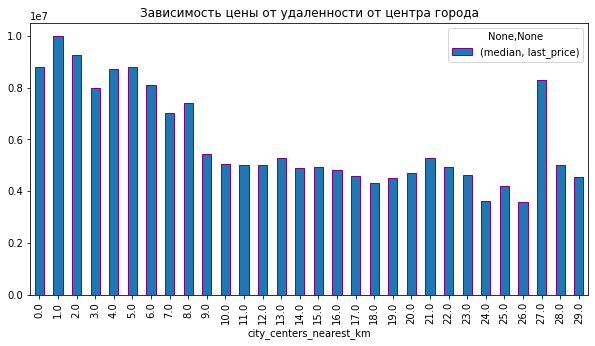

In [117]:
price_km = data.query('locality_name == "санкт-петербург"')
price_km = price_km.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc=['median'])
(price_km.plot(kind='bar', 
                   ec='purple', 
                   figsize=(10,5), 
                   title='Зависимость цены от удаленности от центра города'));

Чем блмже к центру, тем выше стоимость. Выброс в конце диаграмы, вероятно, вызван каким-то дорогим домом(особняк или что-то вроде)

In [110]:
data[(data['locality_name'] == 'санкт-петербург') & (data['city_centers_nearest_km']==27)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_by_sqrm,day_published,month_published,year_published,type_floor,city_centers_nearest_km
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,1496.0,0,NaN,128.0,193918.918919,1,11,2017,другой,27.0
5961,6,2250000.0,32.0,2018-02-27,1,2.65,2,16.5,2,False,...,NaN,0,NaN,178.0,70312.500000,1,2,2018,последний,27.0


### Общий вывод

Подводя итог, можно выделить следующие моменты.

Была проделана предобработка данных, а именно: 
* Была осуществлена работа с пропусками. Там, где было возможно все пропущенные значения были заменены на предполагаемые или медианные. Не затронуты были следующей столбцы: airports_nearest, city_centers_nearest, parks_nearest, ponds_nearest, days_exposition, т.к. эти значения заполнить чем-то конкретным не предоставляется возможным.
* У некоторых столбцов был неверный тип данных (например, у количества балконов был вещественный тип) - это было исправлено.
* Явных дупликатов не было, зато была произведена работа с неявными дупликатами в столбце с названиями населённых пунктов.

Кроме этого, были добавлены новые столбцы с дополнительной информацией: цена за один квадратный метр; день недели, месяц и год публикации объявления; тип этажа квартиры; расстояние до центра города в километрах. 

Были проанализированы различные показатели и их динамика отображена на графиках для наглядности. 

Кроме этого, было изучено, как быстро продавались квартиры: чаще всего, объявление закрывается в течение полугода после публикации. Среднее значение - 148, медианное - 73. Быстрыми продажами можно считать те, что закрылись до 22 дней, а медленными начиная с 193.

Плюс ко всему, были рассмотрены следующие зависимости цены от: общей площади, жилой площади, площади кухни, количества комнат, этажа, на котором расположена квартира и даты размещения. Наиболее сильная зависимость цены есть между следующими показателями: общая площадь (коррел. = 0,78) и жилая (коррел. = 0,65). Решающим фактором в выводе значимости был коэффициент корреляции, который в упомянутых выше зависимостях был выше 6 (что говорит о достаточно сильной тесноте связи).

Также была посчитана средняя цена одного квадратного метро в 10 населенных пунктах. Максимальное медианное значение было в Санкт-Петербурге, а наименьшее в Старополье. И было вычисленно, что чем ближе к центру города, тем выше стоимость за квадратный метр.